<a href="https://colab.research.google.com/github/muhammadanas25/Stock_trend_prediction/blob/main/Mnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
# Initial imports
import pandas as pd
!pip install path
from path import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
# Initial imports
import pandas as pd
import numpy as np
from path import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LogisticRegression

In [109]:
file_path = Path("HPQ.csv")
df = pd.read_csv(file_path)
df.dropna(inplace=True)
df=df[df.FutureTrend !='Neutral']
df.tail()

,Date,Open,High,Low,Close,Volume,EF_1,EF_2,Oil FutureTrend,Gold FutureTrend,Trend,Twitter Sentiments,FutureTrend
749,23/06/2021,29.180000,29.510000,28.959999,29.200001,7914000,0.436366,0.068542,Negative,Positive,Positive,0,Negative
750,24/06/2021,29.500000,29.510000,29.110001,29.469999,6270700,0.899998,-0.101697,Negative,Negative,Negative,0,Negative
751,25/06/2021,29.400000,29.920000,29.370001,29.709999,17050100,0.618179,1.054420,Positive,Negative,Positive,0,Negative
752,28/06/2021,29.760000,30.030001,29.639999,29.809999,6570000,0.435896,0.168008,Negative,Positive,Positive,0,Negative
753,29/06/2021,29.950001,30.320000,29.790001,30.139999,7779100,0.660376,0.634386,Negative,Negative,Positive,0,Negative


In [110]:
# Setting Index as Date
appl_df = df.set_index("Date")
appl_df.tail()

,Open,High,Low,Close,Volume,EF_1,EF_2,Oil FutureTrend,Gold FutureTrend,Trend,Twitter Sentiments,FutureTrend
Date,,,,,,,,,,,,
23/06/2021,29.180000,29.510000,28.959999,29.200001,7914000,0.436366,0.068542,Negative,Positive,Positive,0,Negative
24/06/2021,29.500000,29.510000,29.110001,29.469999,6270700,0.899998,-0.101697,Negative,Negative,Negative,0,Negative
25/06/2021,29.400000,29.920000,29.370001,29.709999,17050100,0.618179,1.054420,Positive,Negative,Positive,0,Negative
28/06/2021,29.760000,30.030001,29.639999,29.809999,6570000,0.435896,0.168008,Negative,Positive,Positive,0,Negative
29/06/2021,29.950001,30.320000,29.790001,30.139999,7779100,0.660376,0.634386,Negative,Negative,Positive,0,Negative


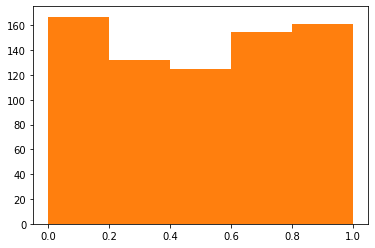

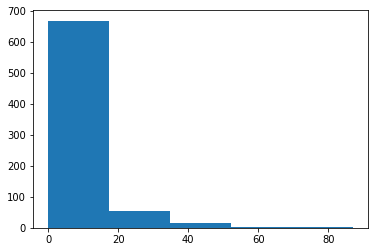

[ 0. 29. 58. 87.]


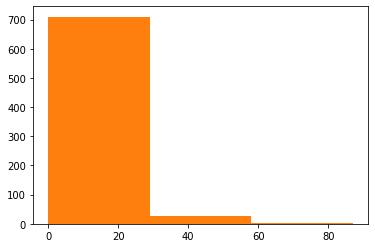

In [111]:


import matplotlib.pyplot as plt
mpgs = df['EF_1']
plt.hist(mpgs, bins=5)
ef1_cut=plt.hist(mpgs, bins=5)[1]
plt.show()
import matplotlib.pyplot as plt
mpgs = df['Twitter Sentiments']
plt.hist(mpgs, bins=5)
plt.show()
twitter_cut=plt.hist(mpgs, bins=3)[1]
print(plt.hist(mpgs, bins=3)[1]
)




In [112]:
def make_bins(df):
   label_names = ["Ef_1_v_low","Ef_1_low","Ef_1_v_med","Ef1_high", "Ef1_very_high" ]
   cut_points =ef1_cut
   df["EF_1_val"] = pd.cut(df["EF_1"], cut_points, labels=label_names)
   dummies = pd.get_dummies(df["EF_1_val"],drop_first=True)
   df = pd.concat([df, dummies], axis=1)
   label_names = ["setinent_neutral","sentiment_good","sentiment_bad"]
   cut_points =twitter_cut
   df["sentiments"]=pd.cut(df['Twitter Sentiments'], cut_points, labels=label_names)
   dummies1 = pd.get_dummies(df["sentiments"],drop_first=True)
   df = pd.concat([df, dummies1], axis=1)
   df.drop(["EF_1_val","sentiments"],axis=1,inplace=True)
   return df
def calculate_ema(prices, days, smoothing=2):
      ema = [sum(prices[:days]) / days]
      for price in prices[days:]:
          ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
      return ema

In [114]:


target=df['FutureTrend']
df=df.drop("FutureTrend",axis =1)
target= target.replace(['Negative','Positive',  'Neutral'],[0,1,2])
df= df.replace(['Negative','Positive',  'Neutral'],[0,1,2])

appl_df =df.set_index('Date',inplace=True)
appl_df = make_bins(df)
appl_df.head(2)
appl_df=appl_df.drop(["Twitter Sentiments"],axis =1)
appl_df['diff']=appl_df['Close']-appl_df['Open']
appl_df['10day']=appl_df['Close'].rolling(10).mean()
appl_df['10day'].fillna(appl_df['10day'][9],inplace=True)
appl_df['Volume']=np.log(appl_df['Volume'])
ema = calculate_ema(appl_df['Close'], 10)
appl_df=appl_df[9:]
target=target[9:]
appl_df['ema']=ema
appl_df['signal']=appl_df['ema']>appl_df['Close']

del (appl_df['Open'])
del (appl_df['Close'])
del (appl_df['High'])
del (appl_df['EF_2'])

from imblearn.over_sampling import SMOTE
# pd.DataFrame(oe_df)
oversample = SMOTE()
appl_df, target = oversample.fit_resample(appl_df, target)

 

from sklearn.ensemble import AdaBoostClassifier
new_df=appl_df
print(new_df.head(2))

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)
numerical_columns = numerical_columns_selector(new_df)
categorical_columns = categorical_columns_selector(new_df)
print(categorical_columns)
preprocessor = ColumnTransformer([
  ('one-hot-encoder', categorical_preprocessor, categorical_columns),
   ('standard-scaler', numerical_preprocessor, numerical_columns)
    ])
new_df=preprocessor.fit_transform(new_df)
X_train,X_test, y_train, y_test = train_test_split(new_df, target, test_size=0.2,random_state=42)

                
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
# prepare transform on dataset
pca.fit(X_train)
# apply transform to dataset
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
model =  LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0)
model.fit(X_train,y_train)        



         Low     Volume      EF_1  Oil FutureTrend  Gold FutureTrend  Trend  \
0  23.510000  15.148272  0.260868                0                 1      0   
1  23.379999  15.225204  0.617650                0                 0      1   

   Ef_1_low  Ef_1_v_med  Ef1_high  Ef1_very_high  sentiment_good  \
0         1           0         0              0               0   
1         0           0         1              0               0   

   sentiment_bad      diff   10day        ema  signal  
0              0 -0.120001  23.232  23.232000   False  
1              0  0.210001  23.305  23.297091   False  
[]


LogisticRegression(multi_class='multinomial')

In [116]:
print("Accuracy score (training): {0:.3f}".format(
        model.score(
            X_train, 
            y_train)))
print("Accuracy score (validation): {0:.3f}".format(
        model.score(
            X_test, 
            y_test)))
  

Accuracy score (training): 0.590
Accuracy score (validation): 0.564


lr variation

In [123]:
model2 =  LogisticRegression()
model2.fit(X_train,y_train)        
print("Accuracy score (training): {0:.3f}".format(
        model2.score(
            X_train, 
            y_train)))
print("Accuracy score (validation): {0:.3f}".format(
        model2.score(
            X_test, 
            y_test)))
  

Accuracy score (training): 0.590
Accuracy score (validation): 0.571
